Accuracy of the model is: 85.8%
Classification results:
index 2171 has 4
index 145 has 0
index 1582 has 3
index 2446 has 4
index 3393 has 6
index 815 has 1
index 1378 has 2
index 529 has 1
index 3945 has 7
index 4628 has 3


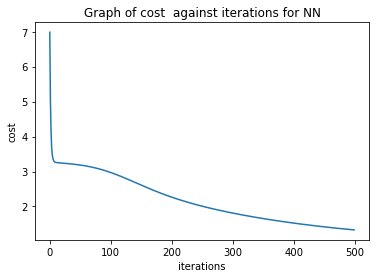

In [3]:
#Implementing a Neuaral Network
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt


df = read_csv('X.csv', header=None)

X = df.values

#storing Y values in temporal variable before transformation
Y_temp = np.loadtxt("Y.csv")

m = Y_temp.shape[0]
labda = 3
lrate = 0.2
costHistory = []
k = 0

#initialising 10D Y
Y = np.zeros((5000, 10)) 
  
#Transforming labels to 10 dimensional vectors
for i in range (m):
    if Y_temp[i]==1.:
        Y[i]=[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif Y_temp[i]==2.:
        Y[i]=[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    elif Y_temp[i]==3.:
        Y[i]=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif Y_temp[i]==4.:
        Y[i]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    elif Y_temp[i]==5.:
        Y[i]=[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    elif Y_temp[i]==6.:
        Y[i]=[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    elif Y_temp[i]==7.:
        Y[i]=[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    elif Y_temp[i]==8.:
        Y[i]=[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif Y_temp[i]==9.:
        Y[i]=[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif Y_temp[i]==10.:
        Y[i]=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

#Initialising W1 weights
dw1 = read_csv('initial_W1.csv', header=None)
#dw1 = read_csv('W1.csv', header=None)
W1 = dw1.values

#Initialising W2 weights
dw2 = read_csv('initial_W2.csv', header=None)
#dw2 = read_csv('W2.csv', header=None)
W2 = dw2.values

#adding bias term to X
X = np.concatenate( (np.ones((m,1)), X), axis=1 )

while True:
    #Computing forward propagation
    
    Z1 = np.dot(X, W1.T)
    H = 1/(1 + np.exp(-Z1))

    #adding bias term to H
    H = np.concatenate( (np.ones((m,1)), H), axis=1 )
    Z2 = np.dot(H, W2.T)

    #prediction
    Y_hat = 1/(1 + np.exp(-Z2))
    t = np.argmax(Y_hat[0])+1

    #This code was used to validate forward propagation implementation
    '''for j in range (m):
        Y_hat_labels[j] = np.argmax(Y_hat[j])+1
    count = 0;
    if(Y_hat_labels[0]==t):
        print("Yes")
    for k in range (m):
        if(Y_hat_labels[k]==Y_temp[k]):
            count = count+1
    print(count/m*100)'''

    #result of first term of loss function
    term1_loss = (-np.sum((np.multiply(Y, np.log(Y_hat)))+ (np.multiply((1-Y), np.log(1-Y_hat)))))/m
    para1=  np.sum(np.multiply(W1[:, 1:], W1[:, 1:]))
    para2=  np.sum(np.multiply(W2[:, 1:], W2[:, 1:]))

    #second term of loss function result
    term2_loss = (labda/(2*m))*(para1+para2)
    cost = term1_loss + term2_loss
    costHistory.append(cost)
    
    #Computing backward propagation
    
    #function computing derivative of sigmoid function
    def sigmoid_derivative(Z):
       sigd = (1/(1 + np.exp(-Z)))*(1-(1/(1 + np.exp(-Z))))
       return sigd

    #derivative of Z1
    Z1_prime = sigmoid_derivative(Z1)

    #declare W2_temp and replace with zeros in first column
    W2_temp = W2[:, 1:]
    W2_temp = np.concatenate( (np.zeros((10,1)), W2_temp), axis=1 )

    #declare W1_temp and replace with zeros in first column
    W1_temp = W1[:, 1:]
    W1_temp = np.concatenate( (np.zeros((25,1)), W1_temp), axis=1 )

    #Calculating gradient descent
    B2 = Y_hat-Y
    B1 = (B2@W2[:, 1:])*Z1_prime
    w2_deri = B2.T@H
    w1_deri = B1.T@X

    w2_grad = ((1/m)*w2_deri)+((labda/m)*W2_temp)
    w1_grad = ((1/m)*w1_deri)+((labda/m)*W1_temp)
    
    #Updating parameters
    W2 = W2-lrate*w2_grad
    W1 = W1-lrate*w1_grad
    k = k+1
    #print("iter", k, ' ', costHistory[-1])
    if k==500:
        break
#testing accuracy of the model        
counts = 0 
Y_hat_labels = np.zeros((5000))
for j in range (m):
    Y_hat_labels[j] = np.argmax(Y_hat[j])+1
    if(Y_hat_labels[j]==Y_temp[j]):
            counts = counts+1
print('Accuracy of the model is: '+str((counts/m)*100)+'%')

#printing sample results for Question 3
#add 1 since in python array indices start at 0
print("Classification results:")

x = np.argmax(Y_hat[2170])+1
if x==10:
    print("index 2171 has", 0)
else:
    print("index 2171 has", x)

x = np.argmax(Y_hat[144])+1
if x==10:
    print("index 145 has",  0)
else:
    print("index 145 has",  x)
    
x = np.argmax(Y_hat[1581])+1
if x==10:
    print("index 1582 has", 0)
else:
    print("index 1582 has", x)

x = np.argmax(Y_hat[2445])+1
if x==10:
    print("index 2446 has", 0)
else:
    print("index 2446 has", x)
    
x = np.argmax(Y_hat[3392])+1
if x==10:
    print("index 3393 has", 0)
else:
    print("index 3393 has", x)
    
x = np.argmax(Y_hat[814])+1
if x==10:
    print("index 815 has", 0)
else:
    print("index 815 has", x)

x = np.argmax(Y_hat[1377])+1
if x==10:
    print("index 1378 has", 0)
else:
    print("index 1378 has", x)

x = np.argmax(Y_hat[528])+1
if x==10:
    print("index 529 has", 0)
else:
    print("index 529 has", x)

x = np.argmax(Y_hat[3944])+1
if x==10:
    print("index 3945 has", 0)
else:
    print("index 3945 has", x)

x = np.argmax(Y_hat[4627])+1
if x==10:
    print("index 4628 has", 0)
else:
    print("index 4628 has", x)

#plotting the cost graph
plt.plot(costHistory)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Graph of cost  against iterations for NN')
plt.show()
